<a href="https://colab.research.google.com/github/MahlaMirali/MachineLearning_Lentil_Seed_Coat_Colour_and_Phenolics/blob/master/ML_4colour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries/ file 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from pprint import pprint
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

**Upload/import the file**


In [0]:
# upload the file into google colab
from google.colab import files
uploaded = files.upload()

Saving ML_4colour.csv to ML_4colour.csv


In [0]:
# import the file into a dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['ML_4colour.csv']))
df

# Data cleaning

In [0]:
# sort the columns alphabatically
df = df.sort_index(axis=1)
# print names of the columns
for col in df.columns: 
    print(col) 
# convert labels to numerical values
print(df['hull'].value_counts())
df['hull1'] = df['hull'].astype('category')
df.dtypes
df['hull1'] = df['hull1'].cat.codes

1155.9I
1155.9II
1171.8I
1171.8II
1171.8III
1187.8I
1187.8II
1187.8III
1204.8I
1204.8II
1204.8III
1444.1I
1444.1II
1460.1I
1460.1II
1475.8I
1475.8II
1492.2I
1492.2II
1509.2I
1509.2II
1525.1
1748.2
1764.4
3_cinn
4_coum
4_sal
595.6I
595.6II
595.6IV
609.6
731.7
883.7I
883.7II
883.7IV
899.7I
899.7II
899.7III
915.6II
915.6III
915.6IV
A2
B1
B2
C1
CCC_I
CCC_II
CCC_III
CC_I
CC_II
Folder
apig
apig_7gluc
cat
cat_13C
cat_gluc
cotyledon
epi_cat
epi_cat_gall
epi_gallo
epi_gallo_gall
flav
flavan
gallo
genotypes
hull
kaem_3gluc
kaemp
kaemp_3robin_7rhamn
kaemp_3rutin
kaemp_7neohesp
kaemp_di_rut
kaemp_rhamn_galact
kaemp_rhamn_gluc_I
kaemp_rhamn_gluc_II
kaempf_rhamn
location
lut
lut_3_7di_gluc
lut_4gluc
lut_7gluc
lut_di_gluc
malv_3galact
myr
myr_3rhamn
narin
querc
querc_3_4di_gluc
querc_3galact
querc_3gluc
querc_3rhamn
querc_3rutin
querc_4gluc
querc_di_glucI
querc_di_glucII
querc_glucI
querc_glucII
querc_glucIII
rep
resv_3gluc
vanil_4gluc
brown    48
grey     48
green    48
tan      48
Name: hull, dtype

In [0]:
# drop the rows with missing data
df = df.drop(df[(df.cat == 0)| (df['1748.2'] == 0)].index)
print(len(df))
# omitting some of the columns
df = df.drop(['Folder','genotypes','location','hull','cotyledon','rep',
                         '4_sal','4_coum','3_cinn','cat_13C'], axis = 1)


190


In [0]:
print(df['hull1'].value_counts())

3    48
1    48
2    47
0    47
Name: hull1, dtype: int64


# **Model # 1 : Random Forest**

 **Original model**

In [0]:
x = np.asarray(df.drop(['hull1'], axis = 1)) 
y= np.asarray(df['hull1'])
pt = PowerTransformer() # for standarizatiion of data with outliers; making mean = 0 and std = 1
x = pt.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  1  1  0]
 [ 0 12  2  1]
 [ 0  4 10  2]
 [ 3  1  2  7]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.80      0.73        15
           2       0.67      0.62      0.65        16
           3       0.70      0.54      0.61        13

    accuracy                           0.70        57
   macro avg       0.70      0.70      0.70        57
weighted avg       0.70      0.70      0.70        57



In [0]:
pprint(model.get_params())

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30, 40],
    'max_features': [20,30, 40],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [7, 10, 12],
    'n_estimators': [200,400, 800]
}
# Create a based model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

**Tuned Model**

In [0]:
x = np.asarray(df.drop(['hull1'], axis = 1)) 
y= np.asarray(df['hull1'])
pt = PowerTransformer() 
x = pt.fit_transform(x)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)
model1 = RandomForestClassifier(n_estimators = 200,min_samples_split = 12
,min_samples_leaf = 4, max_features = 40, max_depth=20, bootstrap= True)
model1.fit(x_train1, y_train1)
y_pred1 = model1.predict(x_test1)
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))
accuracy = metrics.accuracy_score(y_test1, y_pred1)
print(accuracy)
kf = KFold(n_splits=10)
scores1 = cross_val_score(model1, x_train1, y_train1, cv=kf)
print(pd.DataFrame(scores1), np.mean(scores1), np.std(scores1))

[[11  1  0  1]
 [ 1 12  1  1]
 [ 0  3 11  2]
 [ 3  1  2  7]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.71      0.80      0.75        15
           2       0.79      0.69      0.73        16
           3       0.64      0.54      0.58        13

    accuracy                           0.72        57
   macro avg       0.72      0.72      0.71        57
weighted avg       0.72      0.72      0.72        57

0.7192982456140351
          0
0  0.857143
1  0.857143
2  0.785714
3  0.846154
4  0.846154
5  0.615385
6  0.769231
7  0.846154
8  0.923077
9  0.692308 0.8038461538461539 0.08645949650376236


# **Model # 2 : KNN**

**Original model**

In [0]:
x = np.asarray(df.drop(['hull1'], axis = 1)) 
y= np.asarray(df['hull1'])
pt = PowerTransformer() 
x = pt.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)
model = KNeighborsClassifier(n_neighbors=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  1  1  3]
 [ 1 12  2  0]
 [ 0  7  6  3]
 [ 1  2  1  9]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.55      0.80      0.65        15
           2       0.60      0.38      0.46        16
           3       0.60      0.69      0.64        13

    accuracy                           0.61        57
   macro avg       0.64      0.62      0.61        57
weighted avg       0.63      0.61      0.61        57



 **Hyperparameters tuning**

In [0]:
pprint(model.get_params())

In [0]:
param_grid = {
    'n_neighbors': [5,10, 50], 
    'weights': [ 'uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan','minkowski']}
# Create a based model
grid_search = GridSearchCV(model, param_grid = param_grid)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

**Tuned model**

In [0]:
# Evaluating the model with tuned hyper parameters
x = np.asarray(df.drop(['hull1'], axis = 1)) 
y= np.asarray(df['hull1'])
pt = PowerTransformer() 
x = pt.fit_transform(x)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)
model2 = KNeighborsClassifier(metric= 'manhattan', n_neighbors=5, weights= 'distance')
model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))
accuracy = metrics.accuracy_score(y_test2, y_pred2)
print(accuracy)
kf = KFold(n_splits=10)
scores2 = cross_val_score(model2, x_train2, y_train2, cv=kf)
print(pd.DataFrame(scores2), np.mean(scores2), np.std(scores2))

[[ 8  1  0  4]
 [ 0 11  3  1]
 [ 2  4  8  2]
 [ 0  2  2  9]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.61      0.73      0.67        15
           2       0.62      0.50      0.55        16
           3       0.56      0.69      0.62        13

    accuracy                           0.63        57
   macro avg       0.65      0.64      0.63        57
weighted avg       0.64      0.63      0.63        57

0.631578947368421
          0
0  0.785714
1  0.642857
2  0.571429
3  0.615385
4  0.615385
5  0.461538
6  0.769231
7  0.692308
8  0.692308
9  0.461538 0.6307692307692309 0.1059114927388306


# **Model # 3 : SVM**




**Original Model**

In [0]:
x = np.asarray(df.drop(['hull1'], axis = 1)) 
y= np.asarray(df['hull1'])
pt = PowerTransformer() 
x = pt.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  1  1  2]
 [ 0 12  3  0]
 [ 0  4 10  2]
 [ 0  2  1 10]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.63      0.80      0.71        15
           2       0.67      0.62      0.65        16
           3       0.71      0.77      0.74        13

    accuracy                           0.72        57
   macro avg       0.75      0.72      0.73        57
weighted avg       0.74      0.72      0.72        57



**Hyperparameters tuning**

In [0]:
pprint(model.get_params())

In [0]:
# kernel = rbf
param_grid = {
    'C': [ 0.1, 1, 10], 
    'gamma': [  0.1,0.01,0.001], # for rbf
    'kernel': ['rbf']}
# Create a based model
grid_search = GridSearchCV(model, param_grid = param_grid)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

In [0]:
# Evaluating the model with rbf kernel and tuned hyper parameters
model1 = SVC(C= 10, gamma= 0.01, kernel= 'rbf')
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [0]:
# kernel = linear
param_grid = {
    'C': [ 0.1, 1, 10, 100],
        'kernel': ['linear']
    }
# Create a based model
grid_search = GridSearchCV(model, param_grid = param_grid)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

In [0]:
# Evaluating the model with linear kernel and tuned hyper parameters
model2 = SVC(C= 1,  kernel= 'linear')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [0]:
# kernel = poly
param_grid = {
    'C': [  0.01, 1, 10],
    'kernel': ['poly'],
    'degree' : [1,2,3] # for poly
    }
# Create a based model
grid_search = GridSearchCV(model, param_grid = param_grid)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

In [0]:
# Evaluating the model with poly kernel and tuned hyper parameters
model3 = SVC(C= 1, degree= 1, kernel= 'poly')
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**Tuned model**

In [0]:
x = np.asarray(df.drop(['hull1'], axis = 1)) 
y= np.asarray(df['hull1'])
pt = PowerTransformer() 
x = pt.fit_transform(x)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y, train_size = 0.65, test_size = 0.35, random_state = 100)
model3 = SVC(C= 10, gamma= 0.01, kernel= 'rbf')
model3.fit(x_train3, y_train3)
y_pred3 = model3.predict(x_test3)
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))
accuracy = metrics.accuracy_score(y_test3, y_pred3)
print(accuracy)
kf = KFold(n_splits=10)
scores3 = cross_val_score(model3, x_train3, y_train3, cv=kf)
print(pd.DataFrame(scores3), np.mean(scores3), np.std(scores3))

[[13  1  0  2]
 [ 2 12  2  0]
 [ 0  1 15  2]
 [ 2  2  1 12]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.75      0.75      0.75        16
           2       0.83      0.83      0.83        18
           3       0.75      0.71      0.73        17

    accuracy                           0.78        67
   macro avg       0.77      0.78      0.77        67
weighted avg       0.78      0.78      0.78        67

0.7761194029850746
          0
0  0.769231
1  0.769231
2  0.769231
3  0.916667
4  0.750000
5  0.666667
6  0.750000
7  0.666667
8  0.833333
9  0.583333 0.7474358974358973 0.08799580110716523


# Visualization

 **Plot the models**


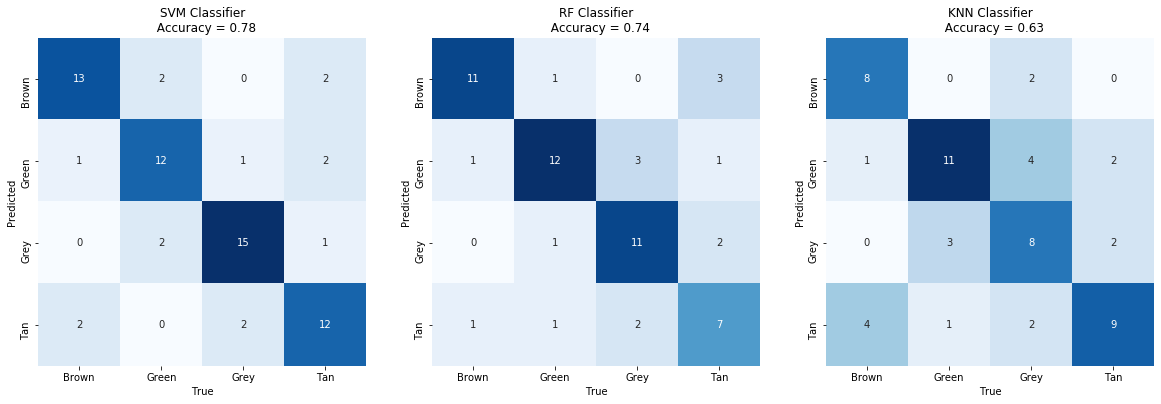

In [0]:
plt.figure(figsize=(20,20))
labels = ['Brown', 'Green', 'Grey', 'Tan']

plt.subplot(1,3,1) # first heatmap

mat1 = confusion_matrix(y_test3, y_pred3)
ax1=sns.heatmap(mat1.T, square=True, annot=True, xticklabels = labels, yticklabels = labels, cbar=False, cmap ='Blues')
ax1.set(title='SVM Classifier\n  Accuracy = 0.78',
      xlabel='True',
      ylabel='Predicted')

plt.subplot(1,3,2) # second heatmap
mat2 = confusion_matrix(y_test1, y_pred1)
ax2=sns.heatmap(mat2.T, square=True, annot=True, xticklabels = labels, yticklabels = labels, cbar=False, cmap ='Blues')
ax2.set(title='RF Classifier\n  Accuracy = 0.74',
      xlabel='True',
      ylabel='Predicted')
 
plt.subplot(1,3,3) # third heatmap
mat3 = confusion_matrix(y_test2, y_pred2)
ax3=sns.heatmap(mat3.T, square=True, annot=True, xticklabels = labels, yticklabels = labels, cbar = False,  cmap ='Blues',
                cbar_kws={'shrink':0.3})

          
ax3.set(title='KNN Classifier\n  Accuracy = 0.63',
      xlabel='True',
      ylabel='Predicted')


plt.savefig('heatmap.png',  dpi=200)
plt.show()


**Plot important features**

In [0]:
# Finding important features
df1=df.drop('hull1', axis = 1)
x_train1_1 = pd.DataFrame(x_train1, columns = df1.columns)
feature_importances = pd.DataFrame(model1.feature_importances_,
                                   index = x_train1_1.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances = feature_importances.round(2)
print(feature_importances.head(5))

           importance
cat_gluc         0.33
cat              0.11
595.6I           0.05
lut_4gluc        0.05
B2               0.04


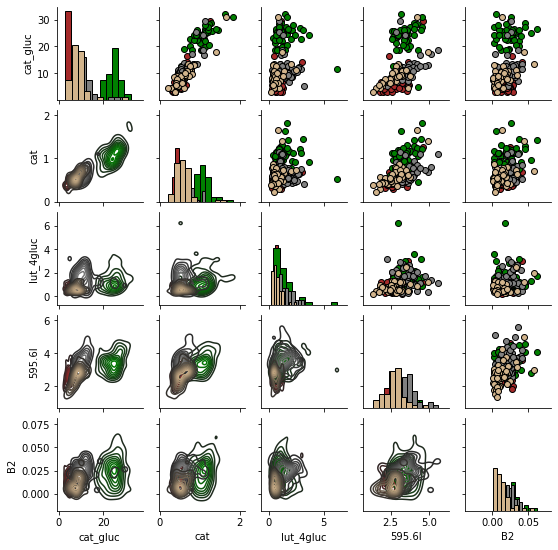

In [0]:
# Plot important features
x = df.drop(['hull1'], axis = 1) 
y= df['hull1']
grid = sns.PairGrid(data=df,hue = 'hull1', 
                  vars = ['cat_gluc','cat','lut_4gluc','595.6I','B2'],
                  palette={ 0: 'brown',1: 'green', 2 : 'grey', 3: 'tan' },height =1.5)
grid = grid.map_upper(plt.scatter, edgecolor = 'k')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)
grid.savefig('pairgrid.png',  dpi=400)

In [0]:
#download the figures
files.download('heatmap.png')
files.download('pairgrid.png')